# Лабораторная работа № 3.1

### Задача:

Используя таблицу значений $Y_i$ функции $y = f (x)$ , вычисленных в точках $X_i, i = 0,...,3$ построить интерполяционные многочлены Лагранжа и Ньютона, проходящие через точки {$X_i$ , $Y_i$} Вычислить значение погрешности интерполяции в точке $X^*$. 

In [1]:
import numpy as np

$$y(x) = e^{x}$$

In [2]:
def y(x):
    return np.exp(x)

| Table1|| Table2||
| :-------: | :-------: | :-------: | :-------: |
| $$ X_{i} $$ | $$ Y_{i} $$ | $$ X_{i} $$ | $$ Y_{i} $$ |
| -2 | 0,13534 | -2 | 0,13534 |
| -1 | 0,36788 | -1 | 0,36788 |
| 0 | 1 | 0.2 | 1.22140 |
| 1 | 2,71828 | 1 | 2,71828 |

$$ X^* = -0.5 $$

In [3]:
X1, X2 = [-2, -1, 0, 1], [-2, -1, 0.2, 1]
Table1 = list(zip(X1, y(X1)))
Table2 = list(zip(X2, y(X2)))
X_star = -0.5

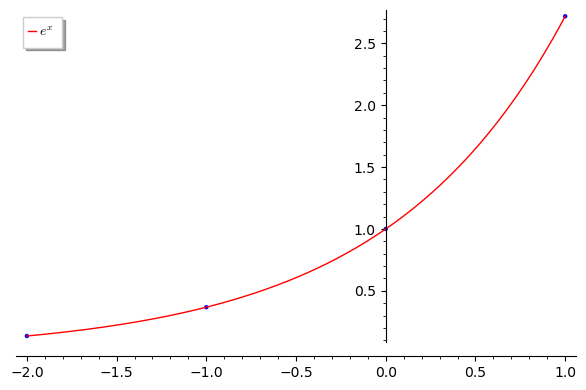

In [4]:
list_plot(Table1) + \
plot(y, (-2,1), color='red', legend_label = '$e^x$')

### Интерполяционный многочлен Лагранжа

$$ L_n(x) = \sum^{n}_{i=0}{y_i\prod^{n}_{j=0,\ j \neq i}{\frac{(x-x_j)}{(x_i-x_j)}}} $$

In [5]:
class LagrangePolynomial():
    
    def __init__(self, Table):
        self.table = Table[:]
        
    def __call__(self, x):
        result = 0
        
        for i in range(len(self.table)):
            temp = 1
            
            for j in range(len(self.table)):
                if i != j:
                    temp *= (x - self.table[j][0]) / (self.table[i][0] - self.table[j][0])
            
            result += temp * self.table[i][1]
            
        return result

Для первой таблицы:

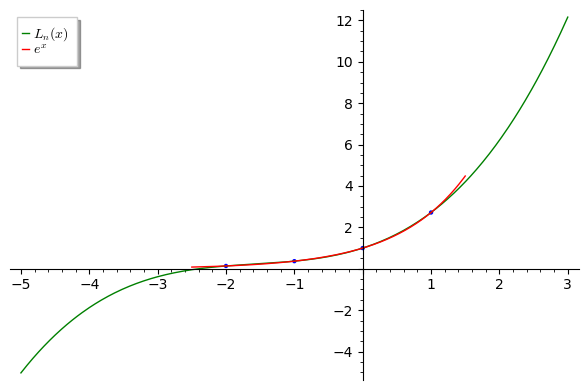

In [6]:
LP = LagrangePolynomial(Table1)

list_plot(Table1) + \
plot(LP, (-5, 3), color='green', legend_label = '$L_n(x)$') + \
plot(y, (-2.5, 1.5), color='red', legend_label = '$e^x$')

Погрешность в точке $X^* = -0.5$

In [7]:
abs(y(X_star) - LP(X_star))

0.015449543534675758

Для второй таблицы:

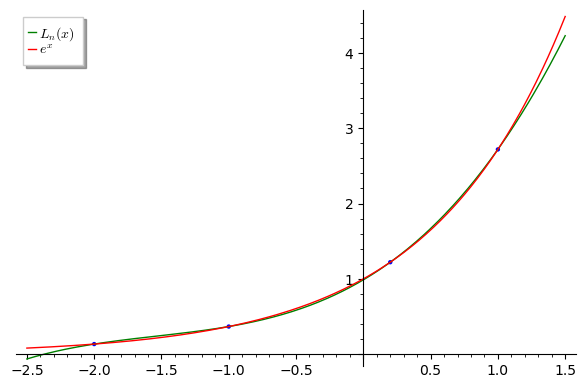

In [8]:
LP = LagrangePolynomial(Table2)

list_plot(Table2) + \
plot(LP, (-2.5, 1.5), color='green', legend_label = '$L_n(x)$') + \
plot(y, (-2.5, 1.5), color='red', legend_label = '$e^x$')

Погрешность в точке $X^* = -0.5$

In [9]:
abs(y(X_star) - LP(X_star))

0.02258199568042696

### Интерполяционный многочлен Ньютона

$$ y^0(x_0) = y_0 $$

$$ y^i(x_0, ..., x_i) =  \frac{y^{i-1}(x_0, ..., x_{i-1}) - y^{i-1}(x_1, ..., x_i)}{x_0 - x_i} $$

$$ N_n(x) = y_0 + \sum^{n}_{i=1}{y^i(x_0, x_1, ..., x_i)\prod^{i-1}_{j=0}{(x - x_j)}} $$

In [10]:
class NewtonPolynomial():
    
    def __init__(self, Table):
        self.table = Table[:]
        self.memo = {}
        
    def __y(self, a, b):
        if (a, b) not in self.memo:
            if a == b:
                self.memo[(a, b)] = self.table[a][1]
            else:
                self.memo[(a, b)] = (self.__y(a, b-1) - self.__y(a+1, b)) / (self.table[a][0] - self.table[b][0])
            
        return self.memo[(a, b)]
    
    def __call__(self, x):
        result = self.table[0][1]
        
        for i in range(1, len(self.table)):
            temp = 1
            
            for j in range(i):
                temp *= (x - self.table[j][0])
        
            result += self.__y(0, i) * temp
        
        return result
    
    def add_point(self, tup = None):
        if tup != None and type(tup) is tuple and len(tup) == 2:
            self.table.append(tup)

Для первой таблицы:

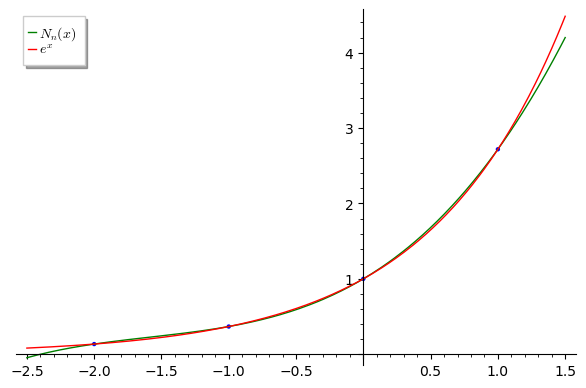

In [11]:
NP = NewtonPolynomial(Table1)

list_plot(Table1) + \
plot(NP, (-2.5, 1.5), color='green', legend_label = '$N_n(x)$') + \
plot(y, (-2.5, 1.5), color='red', legend_label = '$e^x$')

Погрешность в точке $X^* = -0.5$

In [12]:
abs(y(X_star) - NP(X_star))

0.015449543534675758

Для второй таблицы:

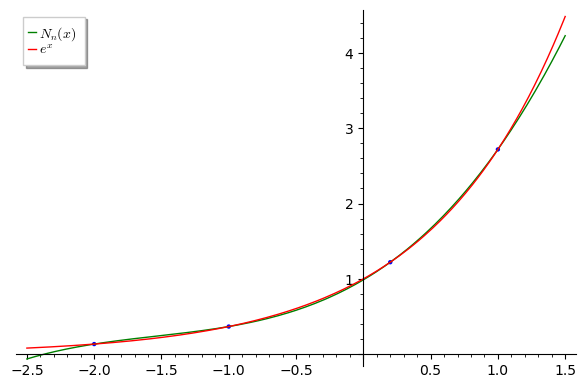

In [13]:
NP = NewtonPolynomial(Table2)

list_plot(Table2) + \
plot(NP, (-2.5, 1.5), color='green', legend_label = '$N_n(x)$') + \
plot(y, (-2.5, 1.5), color='red', legend_label = '$e^x$')

Погрешность в точке $X^* = -0.5$

In [14]:
abs(y(X_star) - NP(X_star))

0.02258199568042707